In [1]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [2]:
def loss_func(x, t):
    delta = 1e-7 # log무한대 발산 방지
    z = np.dot(x, W) + b
    y = sigmoid(z)
    # cross-entropy
    return -np.sum(t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta ))

In [3]:
def predict(test_data):
    z = np.dot(test_data, W) + b
    y = sigmoid(z)
    if y >= 0.5:
        result = 1 # Pass
    else:
        result = 0 # Fail
    return y, result

In [4]:
# 수치미분 함수(
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x) #수치미분된 값 저장할 ndarray로 x와 같은 크기의 0으로 된 배열 생성

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index 
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)

        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)

        x[idx] = tmp_val 
        it.iternext() # 다음 인덱스로 이동 

    return grad

In [5]:
import numpy as np 
from datetime import datetime

x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10,1)
t_data = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(10,1)
W = np.random.rand(1,1)
b = np.random.rand(1)
print(f"x_data.shape = {x_data.shape}, t_data.shape = {t_data.shape}")
print(f"W = {W}, W.shape = {W.shape}, b = {b}, b.shape = {b.shape}")

x_data.shape = (10, 1), t_data.shape = (10, 1)
W = [[0.64112995]], W.shape = (1, 1), b = [0.4041117], b.shape = (1,)


In [7]:
# 수치미분을 이용한 로지스틱 회귀(Logistic Regression) 시스템 학습과정
learning_rate = 1e-2
f = lambda x : loss_func(x_data,t_data) 
print("Initial loss value = ", loss_func(x_data, t_data) )
start_time = datetime.now()
for step in range(50001):
    W -= learning_rate * numerical_derivative(f, W) 
    b -= learning_rate * numerical_derivative(f, b)
    if (step % 5000 == 0): 
        print("step = ", step, "loss value = ", loss_func(x_data, t_data))

Initial loss value =  12.748582044727678
step =  0 loss value =  11.22185872021092
step =  5000 loss value =  0.8449964510151242
step =  10000 loss value =  0.6208936845666123
step =  15000 loss value =  0.5094387481493508
step =  20000 loss value =  0.437746075851212
step =  25000 loss value =  0.38612205713713194
step =  30000 loss value =  0.34650645023486487
step =  35000 loss value =  0.31483479954044624
step =  40000 loss value =  0.28877721783111165
step =  45000 loss value =  0.2668767267161221
step =  50000 loss value =  0.24816314441951567


In [8]:
test_data = np.array([3.0]) # 3 시간에 대한 미래 값 예측
(real_val_1, logical_val_1) = predict(test_data)
print("시그모이드 결과 =>", real_val_1, ", 로지스틱회귀 결과 =>", logical_val_1)
test_data = np.array([17.0]) # 17 시간에 대한 미래 값 예측
(real_val_2, logical_val_2) = predict(test_data)
print("시그모이드 결과 =>", real_val_2, ", 로지스틱회귀 결과 =>", logical_val_2)

시그모이드 결과 => [1.41360393e-09] , 로지스틱회귀 결과 => 0
시그모이드 결과 => [0.9997456] , 로지스틱회귀 결과 => 1


# scikit-learn 실습

In [9]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
dataset = load_breast_cancer()

train = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=['cancer'])

In [20]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
# train data 와 target data 합하기
data = pd.concat([train, target], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['mean radius']], data['cancer'], random_state=42)

In [13]:
print(X_train)
print('-'*22)
print(y_train)
print('-'*22)

     mean radius
287       12.890
512       13.400
402       12.960
446       17.750
210       20.580
..           ...
71         8.888
106       11.640
270       14.290
435       13.980
102       12.180

[426 rows x 1 columns]
--------------------
287    1
512    0
402    1
446    0
210    0
      ..
71     1
106    1
270    1
435    0
102    1
Name: cancer, Length: 426, dtype: int32
--------------------


# LogisticRegression Parameters

- penalty - 비용함수(l1, l2, elasticNet)을 지정. default l2
- dual - Dual Formulation 인지 Promal Formulation인지 결정. default=False
- tol - 중지 기준에 대한 허용 오차값
- C - 규칙강도의 역수 값. default=1.0. 적을수록 정규화가 강해진다.
- fit_intercept - 결정함수에 상수(bias)를 추가할지 결정. default=True
- class_weight - 클래스의 가중치 설정(dict or 'balanced'). default=None
- solver - 최적화에 사용할 알고리즘('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'). default='lbfgs'
- max_iter - solver의 수렴에 걸릴 최대 반복회수. default=100
- vervose - 로그정보 출력
- warm_start - 이전 호출에 사용했던 solution을 재사용할지 여부 결정 default=False
- n_jobs - 병렬처리시 사용할 cpu core 수
- l1_ratio - default=None
- random_state - 난수 시드 설정

In [21]:
# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
# solver : 최적화에 사용핛 알고리즘 설정.
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [22]:
# 모델 예측 및 평가
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print("mean radius 만으로 예측한 결과: ", pred)
accuracy_score(y_test, pred)

mean radius 만으로 예측핚 결과:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1]


0.916083916083916

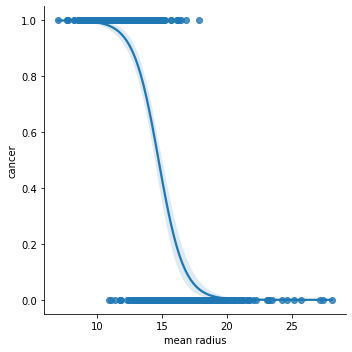

In [23]:
# 모델 그리기:mean radius 피처가 타겟을 어떻게 분류했는지 확인
# pip install statsmodels : statsmodels 설치 확인
from seaborn import lmplot
import matplotlib.pyplot as plt

lmplot(x="mean radius", y="cancer", data=data, logistic=True)
plt.show()

In [26]:
# 전체 데이터로 모델 학습 및 평가
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, :"cancer"], data.loc[:, "cancer"], random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"전체 데이터로 예측한 결과: {score}")

전체 데이터로 예측한 결과: 1.0


In [34]:
dataset = load_breast_cancer()
train = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=['cancer'])

data = pd.concat([train, target], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['mean radius']], data['cancer'], random_state=42)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# solver : 최적화에 사용할 알고리즘 설정.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(X_train_scaled, y_train)
print(f" score: {model.score(X_test_scaled, y_test)}")

# 모델 예측 및 평가
from sklearn.metrics import accuracy_score

pred = model.predict(X_test_scaled)
print("mean radius 만으로 예측한 결과: ", pred)
accuracy_score(y_test, pred)


 score: 0.8881118881118881
mean radius 만으로 예측한 결과:  [1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1]


0.8881118881118881